In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

### Exercise 1 : use Matplotlib libraries to plot this dataset. you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Plot population on x axis and profit on y- axis. Label the dataset and plot graph

In [2]:
Data_df=pd.read_csv("ex1data1.txt",header=None,names=['population','profit'])
Data_df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


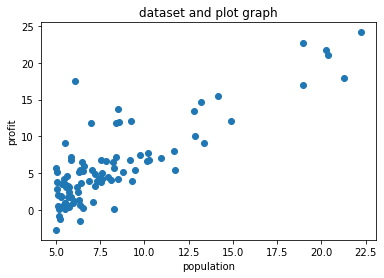

In [3]:
plt.scatter(Data_df['population'], Data_df['profit'])
plt.xlabel('population')
plt.ylabel('profit')
plt.title('dataset and plot graph')
plt.show()


### Exercise 2: use Scikit linear regression algorithm to predict profit as a function of population. The function used out here is y = Mx + C, where the parameter M & C will provide the equation for best fit line (linear regression). Further, y – is profit and X – is population. So purpose of this exercise is derive a simple equation which define profit as a function of population.

In [4]:
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
X=pd.DataFrame(Data_df['population'],columns=['population'])
y=pd.DataFrame(Data_df['profit'],columns=['profit'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
Regresser=LinearRegression()
Regresser.fit(X_train,y_train)

LinearRegression()

In [7]:
coef=Regresser.coef_
intercept=Regresser.intercept_
print(coef)
print(intercept)

[[1.28752876]]
[-4.7323976]


In [8]:
#plt.scatter(Data_df['population'],Data_df['population'].values*Regresser.coef_+Regresser.intercept_)
#y_predict=pd.DataFrame(Regresser.predict(X_test),columns=['profit'])
y_predict=Regresser.predict(X_test)
#y_predict.reset_index
#X_test.reset_index(inplace=True)

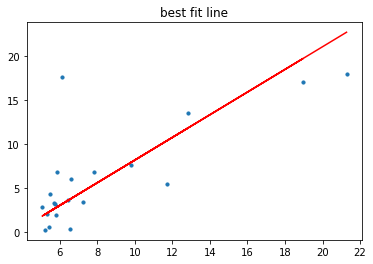

In [9]:
plt.scatter(X_test['population'], y_test, s=10)
plt.plot(X_test['population'], y_predict, color='r')
plt.title("best fit line")
plt.show()

### Exercise 3 : use the parameters obtained for linear regression to plot the linear fit in the same scatter plot used to visualize the data. Purpose is the draw the line y = MX + C, obtained above. You will be able to visualize that straight line is the best fit possible given this data set. For a better representation we will need to fit through a quardratic function of the form y = AX2  + MX + C or an higher order polynomial. 

In [10]:
from sklearn.preprocessing import PolynomialFeatures
x=pd.DataFrame(X_train['population'])
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

In [11]:
Regresser_poly=LinearRegression()
Regresser_poly.fit(x_poly,y_train)

LinearRegression()

In [12]:
X_test_poly=pd.DataFrame(X_test['population'])
X_test_poly = polynomial_features.transform(X_test_poly)
y_test_poly = polynomial_features.fit_transform(y_test)
y_predict_poly=Regresser_poly.predict(X_test_poly)

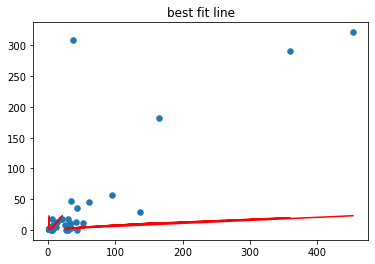

In [13]:
plt.scatter(X_test_poly, y_test_poly, s=30)
plt.plot(X_test_poly, y_predict_poly, color='r')
plt.title("best fit line")
plt.show()